### Задание
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.signal

In [5]:
imageio.__version__

'2.6.0'

In [7]:
# Загрузим изображение
img = imageio.imread('../1_Image_Processing/cat-color.png')

In [10]:
# Переведем в формат float32, диапазон 0 - 1
img = img.astype(np.float32) / 255.
print(img.shape)

(667, 730, 3)


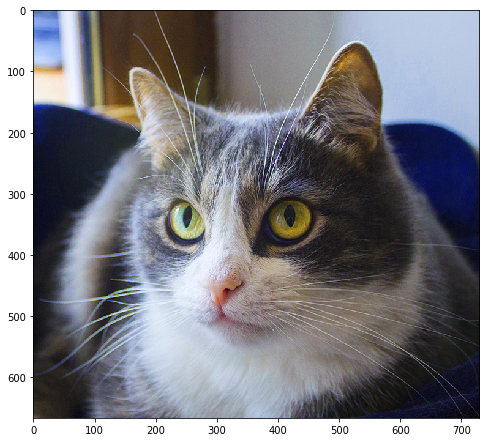

In [12]:
# Посмотрим картинку
plt.figure(figsize=(8, 8))
plt.imshow(img)

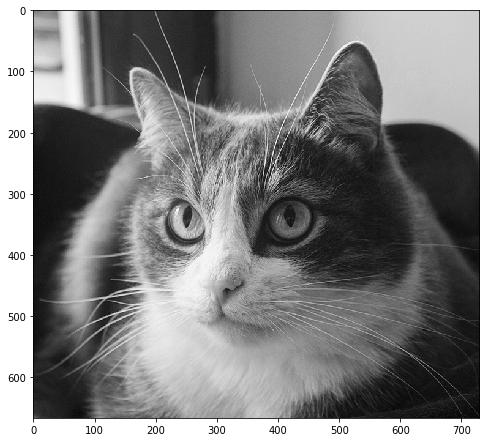

In [14]:
# Получение черно-белого изображения.
img_bw = np.mean(img, axis=2)
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

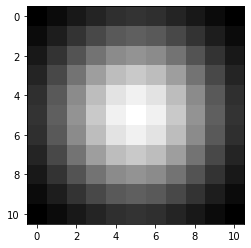

In [18]:
# Создание линейного фильтра
# Box blur
if 0:
    win_size = (11, 11)
    w = np.ones(win_size, dtype=np.float32)
    w = w / np.sum(w)

# Gaussian blur
if 1:
    win_size = (11, 11)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

plt.imshow(w, cmap='gray')

Свертка цветного изображения

In [19]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 478 ms, sys: 22.7 ms, total: 500 ms
Wall time: 506 ms


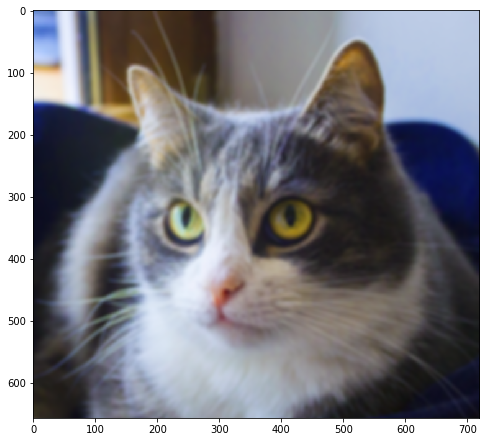

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)